# SMAD3

Pathogenic variants in SMAD3 are associated with [Loeys-Dietz syndrome 3 (LDS3)](https://omim.org/entry/613795).

SMAD3 is a direct mediator of transcriptional activation by the TGF-betaTGF-β receptor -  active TGF-β binds to TGFβRII, which recruits and activates TGFβRI through phosphorylated the GS domain in TGFβRI. TGFβRI phosphorylates and activates Smad2 and Smad3 (R-Smads).

LDS3 is  autosomal dominant syndromic form of thoracic aortic aneurysms and dissections characterised by the presence of arterial aneurysms and tortuosity, mild craniofacial, skeletal and cutaneous anomalies, and early-onset osteoarthritis. ([van der Laar et al., 2012](https://pubmed.ncbi.nlm.nih.gov/22167769/)).

We performed the following PubMed query on 2024-09-24

  
```bash
  (Loeys-Dietz syndrome type 3 OR LDS3 OR "Loeys-Dietz syndrome 3") AND (SMAD3 OR "SMAD3 variants" OR "SMAD3 mutations") AND ("genotype phenotype correlation"    OR " phenotype genotype correlation")
```
This query returned on article, [PMID:31915033](https://pubmed.ncbi.nlm.nih.gov/31915033/), which did not describe GPC analysis of variants specific to the SMAD3 gene.

In [29]:
import gpsea
from gpsea.analysis.predicate import PatientCategories
from gpsea.preprocessing import load_phenopacket_folder
from gpsea.preprocessing import configure_caching_cohort_creator
from gpsea.model import FeatureType, VariantEffect
from gpsea.view import CohortViewable
from gpsea.preprocessing import UniprotProteinMetadataService
from gpsea.model.genome import GRCh38
from gpsea.preprocessing import VVMultiCoordinateService
from gpsea.view import ProteinVisualizable, ProteinVisualizer, ProteinViewable
import hpotk
import gpsea

from IPython.display import display, HTML

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo(release='v2024-08-13')
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2024-08-13
Using gpsea version 0.4.1.dev0


### SMAD3
We user the [Matched Annotation from NCBI and EMBL-EBI (MANE)](https://www.ncbi.nlm.nih.gov/refseq/MANE/) transcript and the corresponding protein identifier for SMAD3.

In [2]:
gene_symbol = 'SMAD3'
mane_tx_id = 'NM_005902.4'
mane_protein_id = 'NP_005893.1' # mothers against decapentaplegic homolog 3 isoform 1 

### Phenopackets
We loaded a cohort of 49 phenopackets representing published descriptions of individuals with pathogenic variants in SMAD3 diagnosed with LDS3.

# TODO -- UPDATE AFTER LATEST phenopacket store release

In [3]:
from ppktstore.registry import configure_phenopacket_registry

phenopacket_store_release = '0.1.19'  # Update, if necessary
registry = configure_phenopacket_registry()

#with registry.open_phenopacket_store(release=phenopacket_store_release) as ps:
#    phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))

## TODO -- UPDATE TO USE phenopacket store after next release
from pyphetools.visualization import PhenopacketIngestor
pp_dir = '/Users/robin/GIT/phenopacket-store/notebooks/SMAD3/phenopackets'
ingestor = PhenopacketIngestor(indir=pp_dir)
phenopackets = ingestor.get_phenopacket_list()


print(f'Loaded {len(phenopackets)} phenopackets')

[pyphetools] Ingested 49 GA4GH phenopackets.
Loaded 49 phenopackets


In [30]:
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

cohort_creator = configure_caching_cohort_creator(hpo)

cohort, qc = load_phenopackets(
    phenopackets=phenopackets, 
    cohort_creator=cohort_creator,
)
print(f'Loaded {len(cohort)} individuals')
qc.summarize()

Individuals Processed: 100%|██████████| 49/49 [00:00<00:00, 759.67individuals/s]
Loaded 49 individuals
Validated under none policy
No errors or warnings were found


# Explorative analysis

We used functions in GPSEA to visualize the distribution of variants. It showed that most variants are missense (33/49=67%) with the remaining 18/49 being frameshift or splice region (and thus likely loss of function) and 3 being an inframe insertion.

# TODO -- Variant Categories do not add up to 100%, we need to explain / check this.

The most commonly encountered variant was c.859C>T	p.Arg287Trp, found in 22 individuals.

Therefore, we chose to investigate potential correlations of Missense vs Other variants, and also  p.Arg287Trp vs. Other.

In [31]:
from gpsea.view import CohortViewable

cv = CohortViewable(hpo)
report = cv.process(cohort, transcript_id=mane_tx_id)
display(HTML(report))

HPO Term,ID,Seen in n individuals
Aortic aneurysm,HP:0004942,26
Osteoarthritis,HP:0002758,26
Soft skin,HP:0000977,23
Scoliosis,HP:0002650,20
Intervertebral disk degeneration,HP:0008419,18
Varicose veins,HP:0002619,14
Hypertelorism,HP:0000316,13
Osteochondritis dissecans,HP:0010886,13
Bifid uvula,HP:0000193,13
High palate,HP:0000218,12


In [32]:
from gpsea.model.genome import GRCh38
from gpsea.preprocessing import configure_protein_metadata_service, VVMultiCoordinateService
txc_service = VVMultiCoordinateService(genome_build=GRCh38)
pms = configure_protein_metadata_service()
tx_coordinates = txc_service.fetch(mane_tx_id)
protein_meta = pms.annotate(mane_protein_id)

/var/folders/hq/zttr8hjx127fgvh0bq7h4bc80000gn/T/ipykernel_42119/1613228306.py:4: DeprecationWarning: Use `configure_default_protein_metadata_service` instead
  pms = configure_protein_metadata_service()


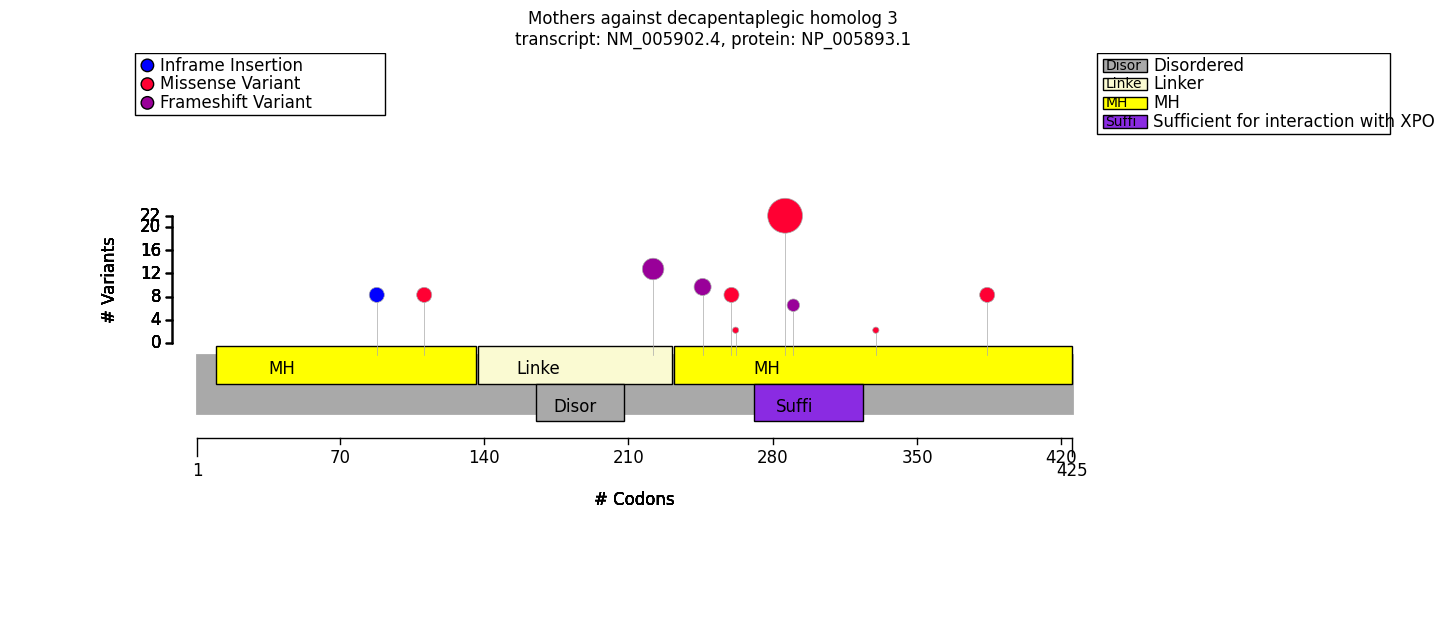

In [33]:
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein_diagram(
    tx_coordinates,
    protein_meta,
    cohort,
    ax=ax,
)
fig.tight_layout()

In [34]:
from gpsea.model import VariantEffect
from gpsea.model.genome import Region

from gpsea.analysis.predicate.genotype import VariantPredicates, ModeOfInheritancePredicate


frameshift_pred = VariantPredicates.variant_effect(VariantEffect.FRAMESHIFT_VARIANT, mane_tx_id)
splice = VariantPredicates.variant_effect(VariantEffect.SPLICE_REGION_VARIANT, mane_tx_id)

gt_predicate = ModeOfInheritancePredicate.autosomal_dominant(frameshift_pred | splice)

/var/folders/hq/zttr8hjx127fgvh0bq7h4bc80000gn/T/ipykernel_42119/577610894.py:10: DeprecationWarning: Use `gpsea.analysis.predicate.genotype.autosomal_dominant` instead
  gt_predicate = ModeOfInheritancePredicate.autosomal_dominant(frameshift_pred | splice)


In [35]:
from gpsea.model import FeatureType
from gpsea.analysis.predicate.phenotype import prepare_predicates_for_terms_of_interest

pheno_predicates = prepare_predicates_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

In [36]:
from gpsea.analysis.pcats.stats import FisherExactTest
from gpsea.analysis.mtc_filter import HpoMtcFilter

mtc_filter = HpoMtcFilter.default_filter(hpo=hpo, term_frequency_threshold=0.2)
mtc_correction = 'fdr_bh'
statistic = FisherExactTest()

In [37]:
from gpsea.analysis.pcats import HpoTermAnalysis

analysis = HpoTermAnalysis(
    count_statistic=statistic,
    mtc_filter=mtc_filter,
    mtc_correction=mtc_correction,
    mtc_alpha=0.05,
)

In [38]:
result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=gt_predicate,
    pheno_predicates=pheno_predicates,
)

In [39]:
from gpsea.view import MtcStatsViewer

viewer = MtcStatsViewer()
report = viewer.process(result)
display(HTML(report))

Code,Reason,Count
HMF01,Skipping term with maximum frequency that was less than threshold 0.2,2
HMF04,Skipping term because all genotypes have same HPO observed proportions,31
HMF05,Skipping term because one genotype had zero observations,3
HMF06,Skipping term with less than 7 observations (not powered for 2x2),20
HMF08,Skipping general term,41


In [40]:
from gpsea.view import summarize_hpo_analysis

report = summarize_hpo_analysis(hpo=hpo, result=result)
report

What is the genotype group                     HOM_REF            HET          \
                                                 Count Percent  Count Percent   
Hypertelorism [HP:0000316]                       13/27     48%    0/8      0%   
Pes planus [HP:0001763]                            0/9      0%    4/8     50%   
Bifid uvula [HP:0000193]                         12/26     46%   1/12      8%   
Osteopenia [HP:0000938]                            1/5     20%    4/4    100%   
Abnormal sternum morphology [HP:0000766]          1/10     10%   5/10     50%   
Joint hypermobility [HP:0001382]                  6/24     25%   6/12     50%   
Disproportionate tall stature [HP:0001519]         2/9     22%   6/10     60%   
Intervertebral disk degeneration [HP:0008419]    17/18     94%    1/2     50%   
Inguinal hernia [HP:0000023]                     10/26     38%   2/13     15%   
Umbilical hernia [HP:0001537]                    10/26     38%   2/13     15%   
Osteochondritis dissecans [HP:0010886]           13/17     76%    0/1      0%   
High palate [HP:0000218]                           4/9     44%   8/11     73%   
Osteoarthritis [HP:0002758]                      21/29     72%    5/9     56%   
Spontaneous pneumothorax [HP:0002108]             0/10      0%   2/10     20%   
Dilatation of the cerebral artery [HP:0004944]     0/4      0%    2/7     29%   
Scoliosis [HP:0002650]                           12/29     41%   8/14     57%   
Varicose veins [HP:0002619]                      12/20     60%    2/2    100%   
Aortic aneurysm [HP:0004942]                     16/32     50%  10/16     62%   
Mitral valve prolapse [HP:0001634]                2/10     20%   1/12      8%   
Striae distensae [HP:0001065]                     1/10     10%   3/10     30%   
Aortic regurgitation [HP:0001659]                 1/10     10%   3/12     25%   
Arachnodactyly [HP:0001166]                        3/9     33%    4/9     44%   
Arterial tortuosity [HP:0005116]                  9/20     45%    2/6     33%   
Soft skin [HP:0000977]                           15/25     60%   8/12     67%   

What is the genotype group                                                   
                                               Corrected p values  p values  
Hypertelorism [HP:0000316]                               0.239808  0.015245  
Pes planus [HP:0001763]                                  0.239808  0.029412  
Bifid uvula [HP:0000193]                                 0.239808  0.029976  
Osteopenia [HP:0000938]                                  0.285714  0.047619  
Abnormal sternum morphology [HP:0000766]                 0.582179  0.140867  
Joint hypermobility [HP:0001382]                         0.582179  0.156919  
Disproportionate tall stature [HP:0001519]               0.582179  0.169802  
Intervertebral disk degeneration [HP:0008419]            0.584211  0.194737  
Inguinal hernia [HP:0000023]                             0.606061  0.269398  
Umbilical hernia [HP:0001537]                            0.606061  0.269398  
Osteochondritis dissecans [HP:0010886]                   0.606061  0.277778  
High palate [HP:0000218]                                 0.678840  0.361848  
Osteoarthritis [HP:0002758]                              0.678840  0.422953  
Spontaneous pneumothorax [HP:0002108]                    0.678840  0.473684  
Dilatation of the cerebral artery [HP:0004944]           0.678840  0.490909  
Scoliosis [HP:0002650]                                   0.678840  0.515059  
Varicose veins [HP:0002619]                              0.678840  0.515152  
Aortic aneurysm [HP:0004942]                             0.678840  0.542124  
Mitral valve prolapse [HP:0001634]                       0.678840  0.571429  
Striae distensae [HP:0001065]                            0.678840  0.582043  
Aortic regurgitation [HP:0001659]                        0.678840  0.593985  
Arachnodactyly [HP:0001166]                              1.000000  1.000000  
Arterial tortuosity [

In [41]:
# 15_67181441_67181441_C_T = p.Arg287Trp
from gpsea.analysis.predicate.genotype import VariantPredicates, monoallelic_predicate
is_var_key = VariantPredicates.variant_key("15_67181441_67181441_C_T")
gt_predicate = monoallelic_predicate(
    a_predicate=is_var_key,
    b_predicate= ~is_var_key,
    names=('p.Arg287Trp', 'Other variant')
)
gt_predicate.display_question()

'Allele group: p.Arg287Trp, Other variant'

In [42]:
result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=gt_predicate,
    pheno_predicates=pheno_predicates,
)
result.total_tests

13

In [43]:
from gpsea.view import summarize_hpo_analysis
summary_df = summarize_hpo_analysis(hpo, result)
summary_df

Allele group                                  p.Arg287Trp          \
                                                    Count Percent   
Osteoarthritis [HP:0002758]                         19/19    100%   
Bifid uvula [HP:0000193]                            10/16     62%   
Inguinal hernia [HP:0000023]                         8/15     53%   
Umbilical hernia [HP:0001537]                        8/15     53%   
Varicose veins [HP:0002619]                         11/19     58%   
Osteochondritis dissecans [HP:0010886]              13/17     76%   
Intervertebral disk degeneration [HP:0008419]       16/17     94%   
Joint hypermobility [HP:0001382]                     3/14     21%   
Soft skin [HP:0000977]                              11/15     73%   
Hypertelorism [HP:0000316]                           7/16     44%   
Aortic aneurysm [HP:0004942]                        10/21     48%   
Arterial tortuosity [HP:0005116]                     7/15     47%   
Scoliosis [HP:0002650]                               9/18     50%   

Allele group                                  Other variant          \
                                                      Count Percent   
Osteoarthritis [HP:0002758]                            7/19     37%   
Bifid uvula [HP:0000193]                               3/22     14%   
Inguinal hernia [HP:0000023]                           4/24     17%   
Umbilical hernia [HP:0001537]                          4/24     17%   
Varicose veins [HP:0002619]                             3/3    100%   
Osteochondritis dissecans [HP:0010886]                  0/1      0%   
Intervertebral disk degeneration [HP:0008419]           2/3     67%   
Joint hypermobility [HP:0001382]                       9/22     41%   
Soft skin [HP:0000977]                                12/22     55%   
Hypertelorism [HP:0000316]                             6/19     32%   
Aortic aneurysm [HP:0004942]                          16/27     59%   
Arterial tortuosity [HP:0005116]                       4/11     36%   
Scoliosis [HP:0002650]                                11/25     44%   

Allele group                                                                
                                              Corrected p values  p values  
Osteoarthritis [HP:0002758]                             0.000484  0.000037  
Bifid uvula [HP:0000193]                                0.029080  0.004474  
Inguinal hernia [HP:0000023]                            0.099322  0.030561  
Umbilical hernia [HP:0001537]                           0.099322  0.030561  
Varicose veins [HP:0002619]                             0.453038  0.272727  
Osteochondritis dissecans [HP:0010886]                  0.453038  0.277778  
Intervertebral disk degeneration [HP:0008419]           0.453038  0.284211  
Joint hypermobility [HP:0001382]                        0.453038  0.292484  
Soft skin [HP:0000977]                                  0.453038  0.313641  
Hypertelorism [HP:0000316]                              0.653980  0.503061  
Aortic aneurysm [HP:0004942]                            0.662784  0.560817  
Arterial tortuosity [HP:0005116]                        0.759110  0.700717  
Scoliosis [HP:0002650]                                  0.763104  0.763104

## Summary
There was no evidence of a correlation between missense variants and specific phenotypic abnormalities. In contrast, there was
a statistically significant correlation with pArg287Trp and Osteoarthritic and Bifid uvula. The residue Arg287 is located in the 
Mad homology 2 (MH2) domain in a region that mediates interaction with exportin 4 (XPO4) ([Kurisaki A, et al.,  2006](https://pubmed.ncbi.nlm.nih.gov/16449645/)).